In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-4/Data-dictionary.xlsx
/kaggle/input/data-storm-4/DataStorm4.0_KaggleProblemStatement.pdf
/kaggle/input/data-storm-4/Store-info.csv
/kaggle/input/data-storm-4/Testing-data.csv
/kaggle/input/data-storm-4/Historical-transaction-data.csv


In [2]:
import pandas as pd

# Load dataset1 and dataset2 into dataframes
dataset1 = pd.read_csv("/kaggle/input/data-storm-4/Historical-transaction-data.csv")
dataset2 = pd.read_csv("/kaggle/input/data-storm-4/Store-info.csv")

# Join the two dataframes based on shop_id
df = pd.merge(dataset1, dataset2, on="shop_id")

In [3]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220,1,678,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440,1,678,Moderate


In [4]:
df.isnull().sum()


item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
shop_area_sq_ft         0
shop_profile        86633
dtype: int64

In [5]:
num_data = df.select_dtypes(exclude = ['object'])
num_data.describe()

,invoice_id,item_price,quantity_sold,shop_area_sq_ft
count,4.676540e+05,473974.000000,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506,624.964087
std,1.344594e+06,166.764732,1.634535,122.021587
min,1.700000e+01,35.000000,-1.000000,298.000000
25%,1.032114e+06,100.000000,1.000000,576.000000
50%,2.032996e+06,200.000000,2.000000,617.000000
75%,3.032568e+06,220.000000,2.000000,676.000000
max,8.331754e+06,17400.000000,101.000000,1077.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

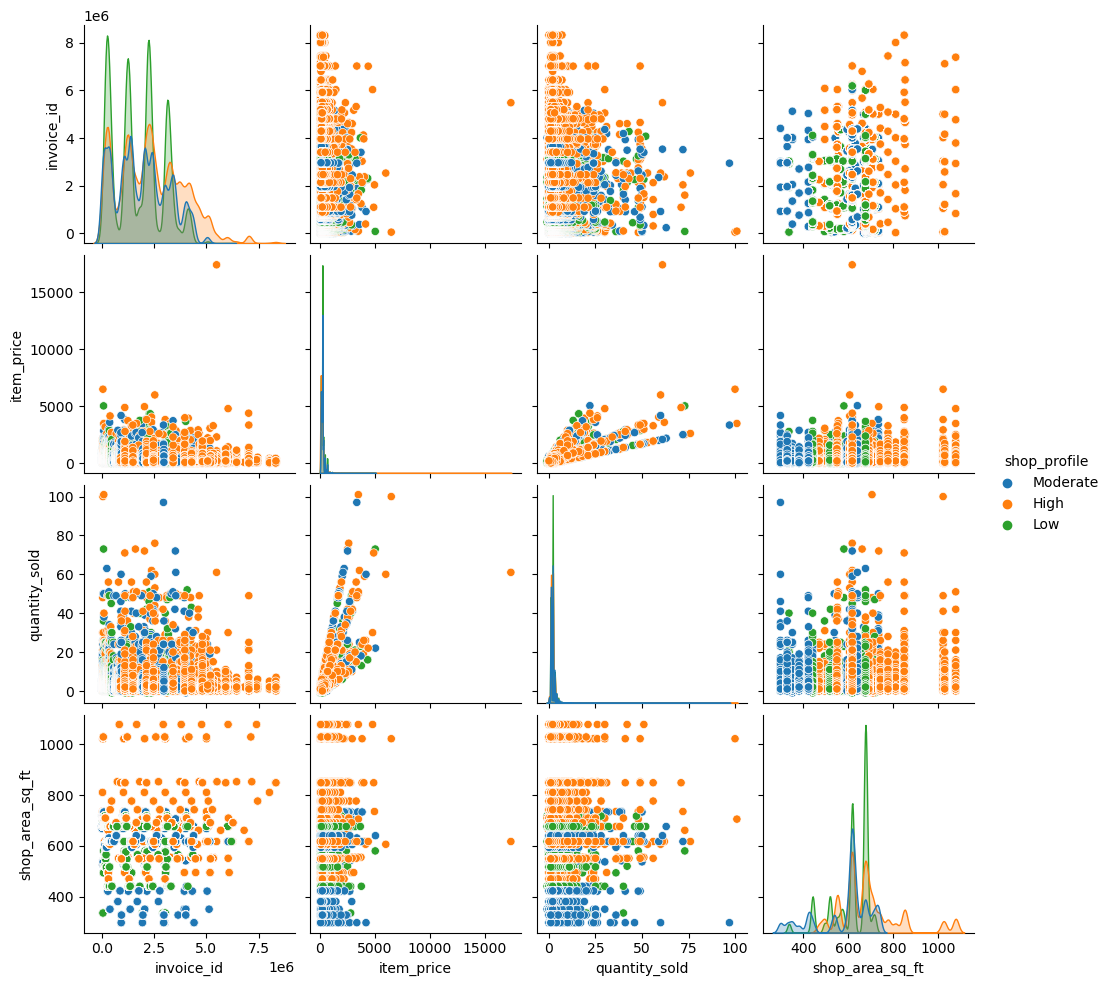

In [7]:
sns.pairplot(hue = 'shop_profile',data = df)

<AxesSubplot:xlabel='item_price', ylabel='quantity_sold'>

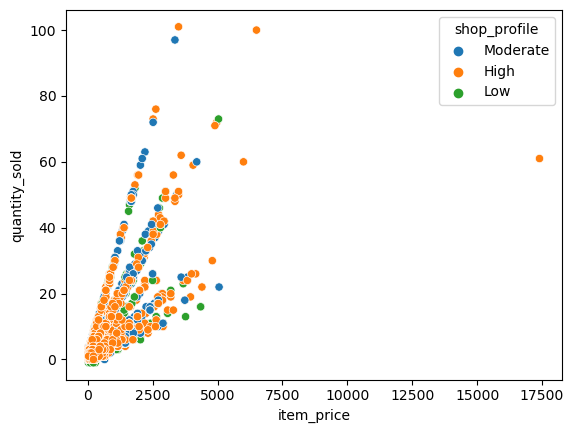

In [8]:
#Univariate analysis
sns.scatterplot(x ="item_price", y= 'quantity_sold', hue="shop_profile", data = df )

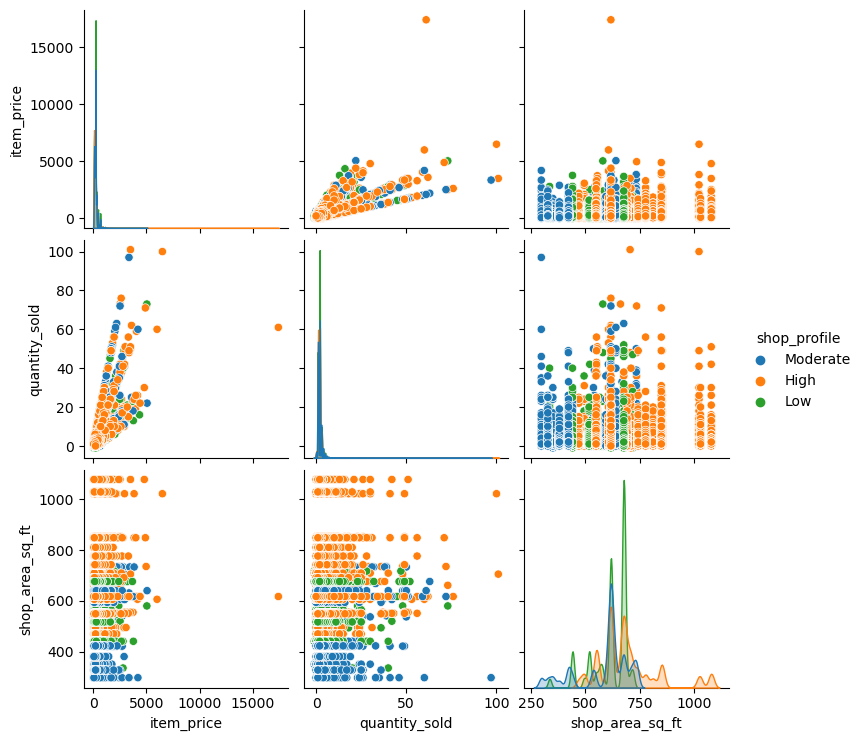

In [9]:
sns.pairplot(vars= ['item_price', 'quantity_sold','shop_area_sq_ft'],hue = 'shop_profile',data = df)

In [10]:
df_corr = df[['item_price', 'quantity_sold','shop_area_sq_ft']].dropna().corr()
df_corr

,item_price,quantity_sold,shop_area_sq_ft
item_price,1.000000,0.605501,-0.018251
quantity_sold,0.605501,1.000000,-0.003113
shop_area_sq_ft,-0.018251,-0.003113,1.000000


<AxesSubplot:>

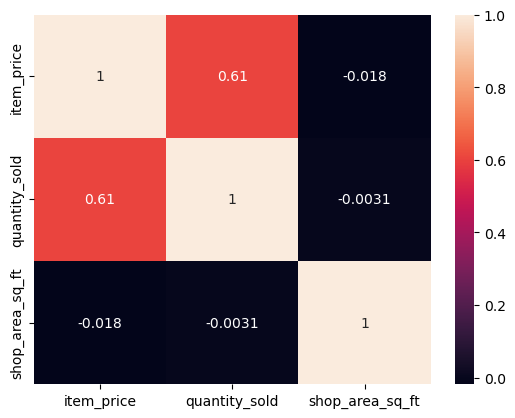

In [11]:
sns.heatmap(df_corr, annot = True)

In [12]:
def visualize_numeric_features(data_frame, col_name, bin_size):
    fig, ax = plt.subplots(1,2, figsize = (12,5))
    sns.histplot(data = data_frame, x = col_name, binwidth=bin_size, ax=ax[0]);
    sns.boxplot(data = data_frame, y = col_name, ax=ax[1]);


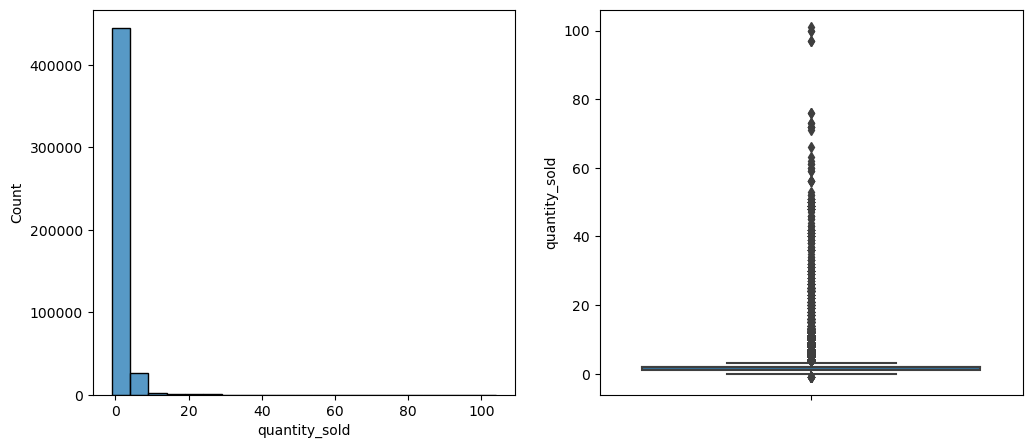

In [13]:
visualize_numeric_features(df, 'quantity_sold', 5)

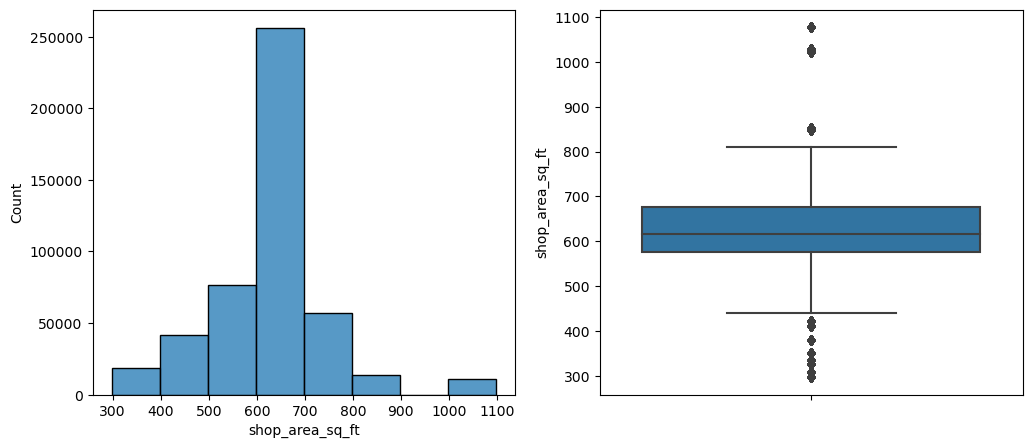

In [14]:
visualize_numeric_features(df, 'shop_area_sq_ft', 100)

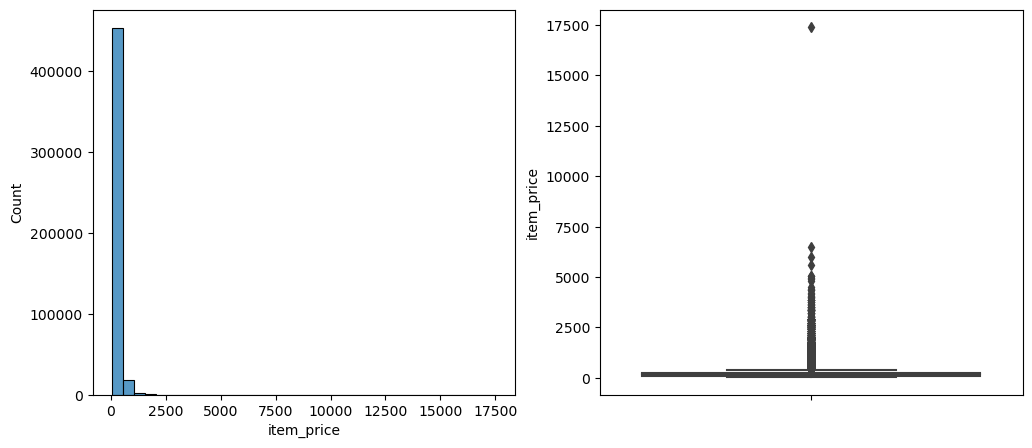

In [15]:
visualize_numeric_features(df, 'item_price', 500)

In [16]:
#What happens to item price with the time
#Customer and the product
#shop_id and products
